# Small energy systems example

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Complete"


A simple problem with three processes

- Solar Photovoltaics with varying capacity factor (PV)
- Wind Farm with varying capacity factor (WF)
- Lithium-ion battery storage (LiI)
- Lithium-ion battery storage dicharge [generated implicitly] (LiI_discharge)


Required resources are:

- Solar energy
- Wind energy
- Power with varying demand
- LiI_Power_stored [generated implicity]

The problem is modeled over two scales (0,1), with 1 and 4 discretizations respectively

- 0, network scale with 1 time period
- 1, scheduling and demand scales with 4 time periods

**Nomenclature**

The sets and variables used are stated here

*Sets*


- $\mathcal{R}$ - set of all resources r
- $\mathcal{P}$ - set of all processes p
- $\mathcal{T}$ - set of temporal periods p



*Subsets*

- $\mathcal{R}^{storage}$ - set of resources that can be stored
- $\mathcal{R}^{sell}$ - set of resources that can be discharged
- $\mathcal{R}^{demand}$ - set of resources that meet  demand
- $\mathcal{R}^{cons}$ - set of resources that can be consumed
- $\mathcal{T}$ - set of temporal periods 
- $\mathcal{T}^{net}$ - set of temporal periods t for network level decision making
- $\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making




*Continuous Variables*

- $P_{p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  
    
- $C_{r,t}$ - consumption of r $\in$ $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 
    
- $S_{r,t}$ - discharge of r $\in$ R\ $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 
    
- $Inv_{r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$
    
- $Cap^{S}_{r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$
    
- $Cap^{P}_{p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$
    

*Parameters*

- $Cap^{P-max}_{p,t}$- maximum production capacity of process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$
- $Cap^{S-max}_{r,t}$- maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$
- $Capex_{p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$
- $Price_{r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$
- $C^{max}_{r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$
- $D_{r,t}$ - demand for resource r in $R^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

**LP Formulation**


Given is a general MILP modeling and optimization framework for simultaneous network design and scheduling for a single location problem.

\begin{equation}
    min \sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} Capex_{p,t} \times Cap^P_{p,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}}  Price_{r,t}  \times C_{r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{p \in \mathcal{P}}  Vopex_{r,t} \times P_{r,t} 
\end{equation}


\begin{equation}
    Cap^S_{r,t} \leq Cap^{S-max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{p,t} \leq Cap^{P-max}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation} 

\begin{equation}
    P_{p,t} \leq Cap^{P}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{r,t} \leq Cap^{S}_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{r,t} \leq - D_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{r,t} \leq C^{max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} + Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation}
    S_{r,t}, C_{r,t}, Inv_{r,t}, P_{p,t}, Cap^P_p, Cap^S_r \in R_{\geq 0}
\end{equation}


**Import modules**

In [1]:
import sys
sys.path.append('../../src')

In [2]:
import pandas
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, ProcessMode, VaryingProcess
from energiapy.components.location import Location
from energiapy.components.scenario import Scenario
from energiapy.components.result import Result
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve


**Input Data**

Factors are normalized, and can be used to account for:

- variable resource demand (demand_factor)
- intermittent resource availability (capacity factor)
- varying resource purchase cost (cost factor)

In [3]:
demand_factor = pandas.DataFrame(data={'Power': [0.6, 0.7, 0.8, 0.3]})
revenue_factor = pandas.DataFrame(data={'Power': [0.8, 0.9, 0.94, 0.96]})
capacity_factor_pv = pandas.DataFrame(data={'PV': [0.6, 0.8, 0.9, 0.7]})
capacity_factor_wf = pandas.DataFrame(data={'WF': [0.9, 0.8, 0.5, 0.7]})


**Declare temporal scale**


Consider four seasons in a year.

Network decisions are taken annually (scale level 0)

Scheduling decisions are taken seasonally (scale level 1)


In [4]:
scales = TemporalScale(discretization_list=[1, 4])


**Declare resources**

Resources can be declared with attributes such as maximum consumption (cons_max), resource price (price), maximum allowed inventory (store_max)

As also whether they can be discharged (sell), have to meet demand (demand)

In [5]:
Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', demand=True,
                 label='Power generated', varying=[VaryingResource.DETERMINISTIC_DEMAND, VaryingResource.DETERMINISTIC_REVENUE], revenue = 800000)


**Declare processes**

Processes consume resources and can be of three type:

- storage, if storage = some_resource 
- single mode, as with the processes defined here wherein a conversions are provided
- multi mode, if a multiconversion dict is provided

In [6]:
LiI = Process(name='LiI', storage=Power, capex=1302182, fopex=41432, vopex=2000,
              prod_max=100, prod_min=0, store_max=100, label='Lithium-ion battery', basis='MW')

WF = Process(name='WF', conversion={Wind: -1, Power: 1}, capex=990637, fopex=3354, vopex=4953,
             prod_max=100, prod_min=0, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1}, capex=567000, fopex=872046, vopex=90000,
             prod_max=100, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')


In [8]:
help(Process)

Help on class Process in module energiapy.components.process:

class Process(builtins.object)
 |  Process(name: str, introduce: int = 0, retire: int = None, conversion: Union[Dict[int, Dict[energiapy.components.resource.Resource, float]], Dict[energiapy.components.resource.Resource, float]] = None, capex: Union[float, dict] = None, fopex: Union[float, dict] = None, vopex: Union[float, dict] = None, incidental: float = None, material_cons: Dict[energiapy.components.material.Material, float] = None, prod_max: Union[Dict[int, float], float] = 0, prod_min: float = 0, basis: str = 'unit', credit: float = None, gwp: float = 0, land: float = 0, trl: str = None, block: str = '', citation: str = 'citation needed', lifetime: int = None, varying: List[energiapy.components.process.VaryingProcess] = None, p_fail: float = None, label: str = '', storage: energiapy.components.resource.Resource = None, storage_loss: float = 0, store_max: float = 0, store_min: float = 0, rate_max: Union[Dict[int, float]

**Declare location**


Locations are essentially a set of processes, the required resources are collected implicitly.

Location-wise capacity, demand, and cost factors can be provided. 

The scales of the capacity and demand data need to be provided as well.

In [7]:
place = Location(name='place', processes={LiI, PV, WF}, demand_factor={Power: demand_factor}, capacity_factor={PV: capacity_factor_pv, WF: capacity_factor_wf},
                 revenue_factor={Power:revenue_factor} , capacity_scale_level=1, demand_scale_level=1, scales=scales, label='some place')


**Declare scenario**

The combination of parameter data, locations, and transportation options generates a scenario. 

Scenarios are data sets that can be fed to models for analysis. 

In this case we are generating a scenario for the location houston. The scales need to be consistent.

The demand, network, scheduling, and expenditure scales need to be provided. They all default to 0.

In [8]:
case = Scenario(name='case', network=place, demand_scale_level=1, network_scale_level=0,
                scheduling_scale_level=1, scales=scales,  demand={place: {Power: 180}}, label='small scenario')


In [9]:
place.resource_revenue

{'Solar': 0, 'Wind': 0, 'Power': 800000}

In [10]:
case.revenue_factor

{'place': {'Power': {(0, 0): 0.8333333333333334,
   (0, 1): 0.9375000000000001,
   (0, 2): 0.9791666666666666,
   (0, 3): 1.0}}}

**Plot conversion factors**

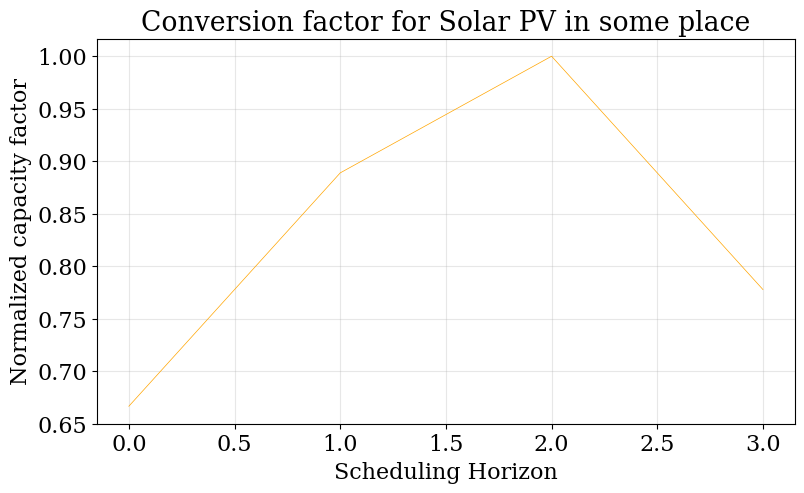

In [11]:
plot_scenario.capacity_factor(
    scenario=case, location=place, process=PV, fig_size=(9, 5), color='orange')


![PV capacity factor](plots/cf_pv.png)

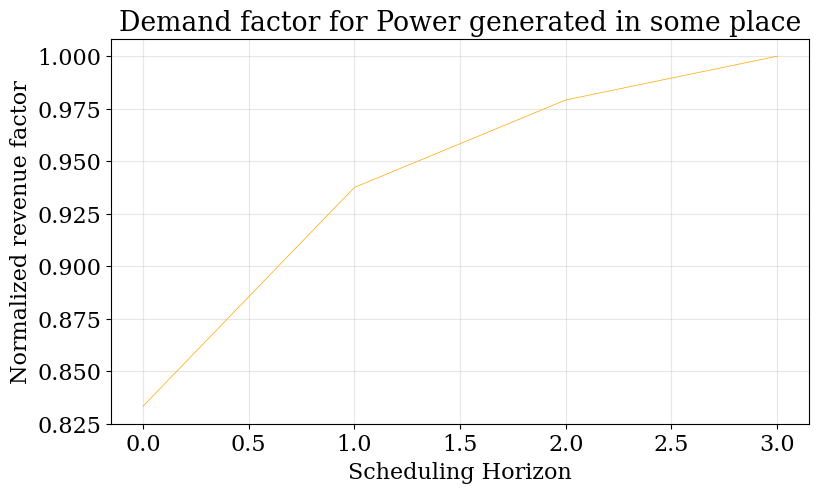

In [12]:
plot_scenario.revenue_factor(
    scenario=case, location=place, resource=Power, fig_size=(9, 5), color='orange')

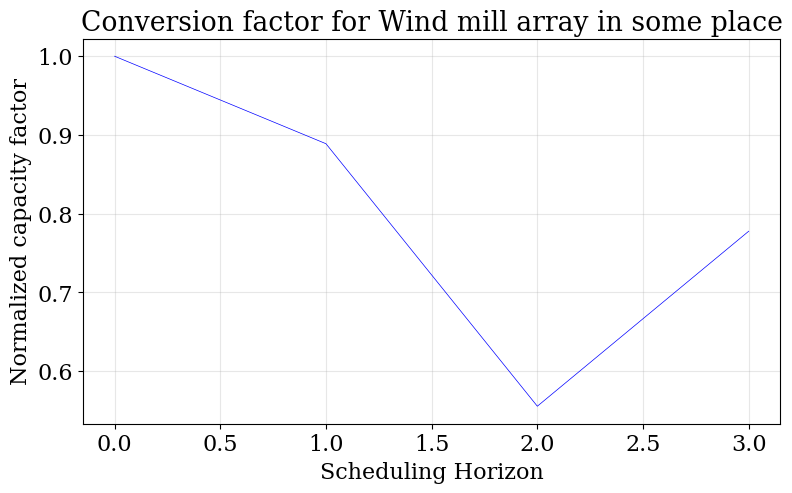

In [13]:

plot_scenario.capacity_factor(
    scenario=case, location=place, process=WF, fig_size=(9, 5), color='blue')


![WF capacity factor](plots/cf_wf.png)

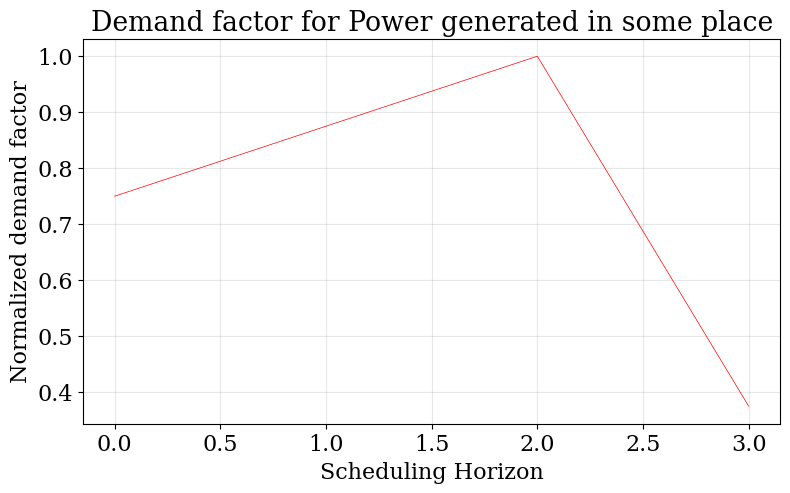

In [14]:
plot_scenario.demand_factor(
    scenario=case, location=place, resource=Power, fig_size=(9, 5), color='red')


![Power demand factor](plots/df_power.png)

**Formulate LP**

Models can be formulated using different constraints and objectives.

milp is a pyomo instance, additional constraints can be provided in a bespoke manner

In [15]:
# lp = formulate(scenario=case, constraints={Constraints.COST, Constraints.INVENTORY,
#                  Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE}, objective=Objective.COST)
lp = formulate(scenario=case, constraints={Constraints.COST, Constraints.INVENTORY,
                 Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE}, objective=Objective.PROFIT)


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint location capex
constraint location fopex
constraint location vopex
constraint location incidental
constraint network capex
constraint network fopex
constraint network vopex
constraint network incidental
constraint nameplate inventory
constraint storage max
constraint storage min
constraint production mode
constraint nameplate production
constraint production max
constraint production min
constraint inventory balance
constraint resource consumption
constraint resource purchase
constraint location production
constraint location discharge
constraint location consumption
constraint location purchase
constraint network production
constraint network discharge
constraint network consumption
constraint network purchase
constraint resource revenue
constraint location revenue
constraint network revenue
objective profit


**Solve**

To solve the model, the solve requires a scenario and a modeling instance to be provided. 

Also a solver needs to be chosen.

In [16]:
results = solve(scenario=case, instance=lp, solver='gurobi', name='LP')
# results = solve(scenario=case, instance=lp, solver='BARON', interface= 'gams', name='LP')


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 126 rows, 110 columns and 281 nonzeros
Model fingerprint: 0x90016b5e
Coefficient statistics:
  Matrix range     [6e-01, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve removed 116 rows and 96 columns
Presolve time: 0.01s
Presolved: 10 rows, 14 columns, 29 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.4978970e+08   3.759899e+01   0.000000e+00      0s
      10    2.1584107e+08   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.158410741e+08


Models can be summarized as shown below:

In [17]:
lp.constraint_resource_revenue.pprint()

constraint_resource_revenue : revenue of resource
    Size=4, Index=constraint_resource_revenue_index, Active=True
    Key                      : Lower : Body                                                      : Upper : Active
    ('place', 'Power', 0, 0) :   0.0 : R[place,Power,0,0] - 666666.6666666667*S[place,Power,0,0] :   0.0 :   True
    ('place', 'Power', 0, 1) :   0.0 : R[place,Power,0,1] - 750000.0000000001*S[place,Power,0,1] :   0.0 :   True
    ('place', 'Power', 0, 2) :   0.0 : R[place,Power,0,2] - 783333.3333333333*S[place,Power,0,2] :   0.0 :   True
    ('place', 'Power', 0, 3) :   0.0 :          R[place,Power,0,3] - 800000.0*S[place,Power,0,3] :   0.0 :   True


In [18]:
results.output

{'termination': 'optimal',
 'LB': 215841074.07407403,
 'UB': 215841074.07407403,
 'n_cons': 126,
 'n_vars': 110,
 'n_binvars': 0,
 'n_intvars': 0,
 'n_convars': 110,
 'n_nonzero': 281,
 'P': {('place', 'PV', 0, 0): 66.66666666666666,
  ('place', 'PV', 0, 1): 88.8888888888889,
  ('place', 'PV', 0, 2): 100.0,
  ('place', 'PV', 0, 3): 77.77777777777777,
  ('place', 'WF', 0, 0): 100.0,
  ('place', 'WF', 0, 1): 88.8888888888889,
  ('place', 'WF', 0, 2): 55.55555555555556,
  ('place', 'WF', 0, 3): 77.77777777777777,
  ('place', 'LiI_discharge', 0, 0): 0.0,
  ('place', 'LiI_discharge', 0, 1): 0.0,
  ('place', 'LiI_discharge', 0, 2): 0.0,
  ('place', 'LiI_discharge', 0, 3): 0.0,
  ('place', 'LiI', 0, 0): 0.0,
  ('place', 'LiI', 0, 1): 0.0,
  ('place', 'LiI', 0, 2): 0.0,
  ('place', 'LiI', 0, 3): 0.0},
 'B': {('place', 'Solar', 0, 0): 0.0,
  ('place', 'Solar', 0, 1): 0.0,
  ('place', 'Solar', 0, 2): 0.0,
  ('place', 'Solar', 0, 3): 0.0,
  ('place', 'Wind', 0, 0): 0.0,
  ('place', 'Wind', 0, 1):

In [19]:
results.model_summary()


SUMMARY:
            number of constraints: 126
            number of variables: 110
            number of binary variables: 0
            number of integer variables: 0
            number of continuous variables: 110


**Results**

Some handy plotting functions such as schedule can plot the consumption (C), sales(S), inventory schedules (Inv) for any resource, and production (P) for any process. Component can be either a process or resource. 

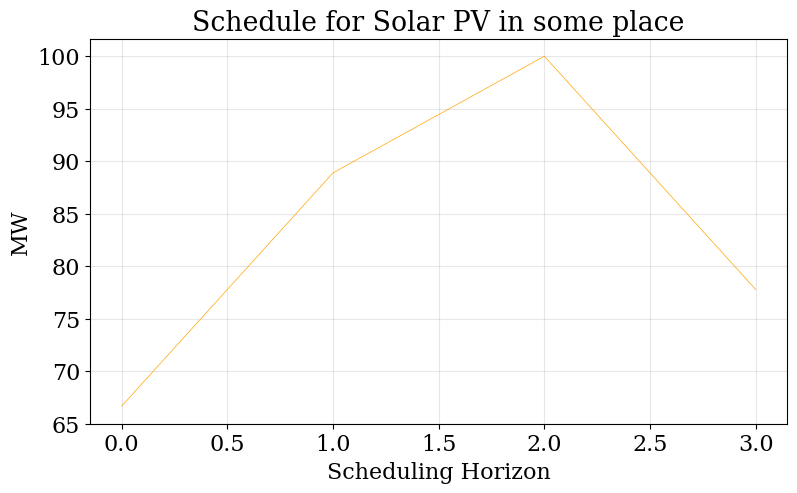

In [20]:
plot_results.schedule(results=results, y_axis='P', component='PV',
                      location='place', fig_size=(9, 5), color='orange')


![PV schedule](plots/sch_pv.png)

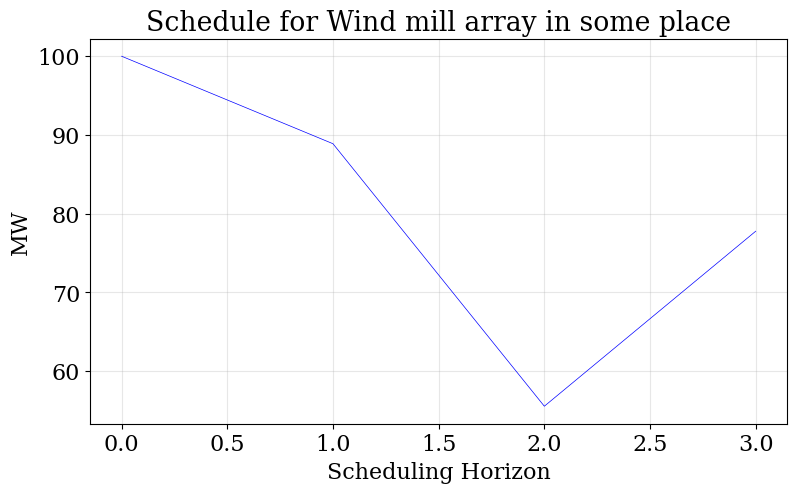

In [21]:
plot_results.schedule(results=results, y_axis='P', component='WF',
                      location='place', fig_size=(9, 5), color='blue')


![WF schedule](plots/sch_wf.png)

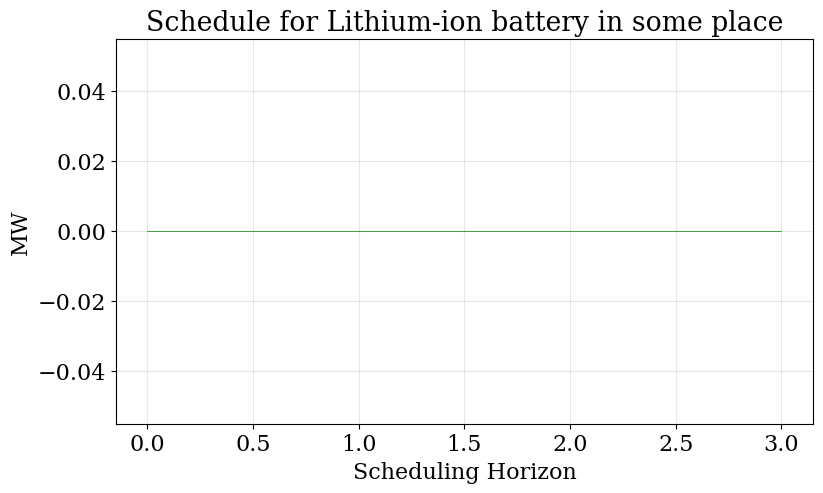

In [22]:
plot_results.schedule(results=results, y_axis='P', component='LiI',
                      location='place', fig_size=(9, 5), color='green')


![LiI schedule](plots/sch_lii.png)


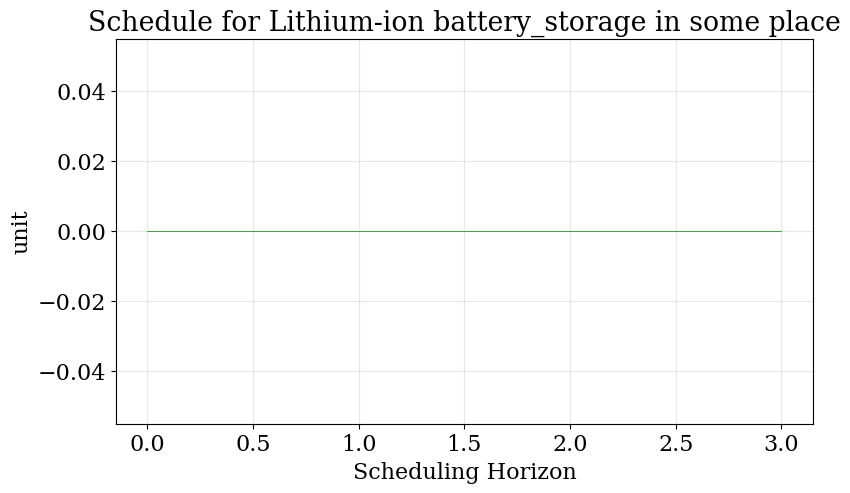

In [23]:
plot_results.schedule(results=results, y_axis='P', component='LiI_discharge',
                      location='place', fig_size=(9, 5), color='green')


![LiI charging schedule](plots/sch_lii_charge.png)

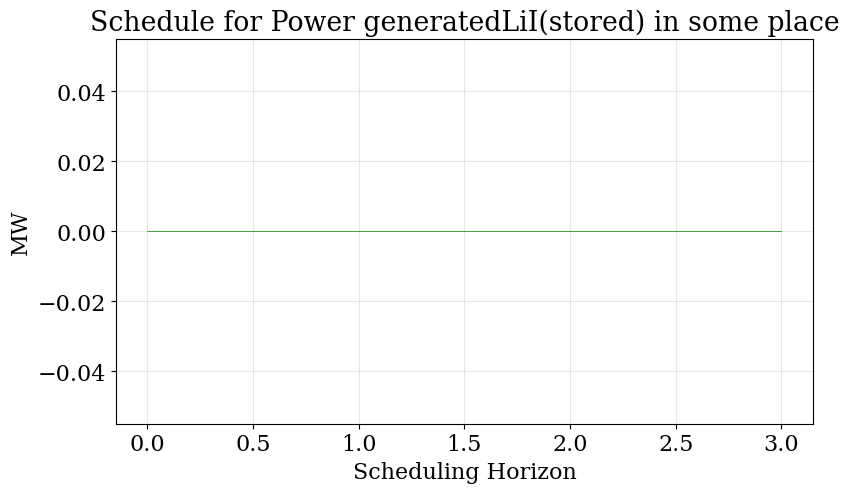

In [24]:
plot_results.schedule(results=results, y_axis='Inv', component='LiI_Power_stored',
                      location='place', fig_size=(9, 5), color='green')


![LiI discharging schedule](plots/sch_lii_dcharge.png)

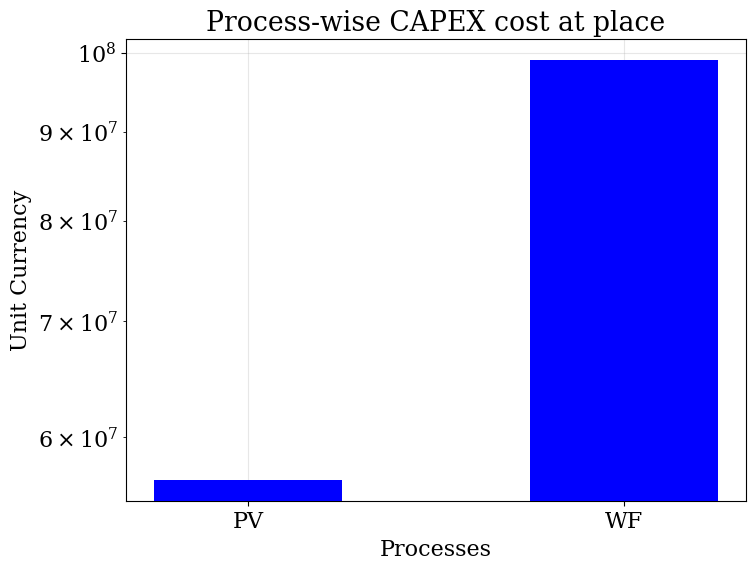

In [25]:
plot_results.cost(results=results, x=CostX.PROCESS_WISE,
                  y=CostY.CAPEX, location='place', fig_size=(8, 6))


![Capex](plots/capex.png)


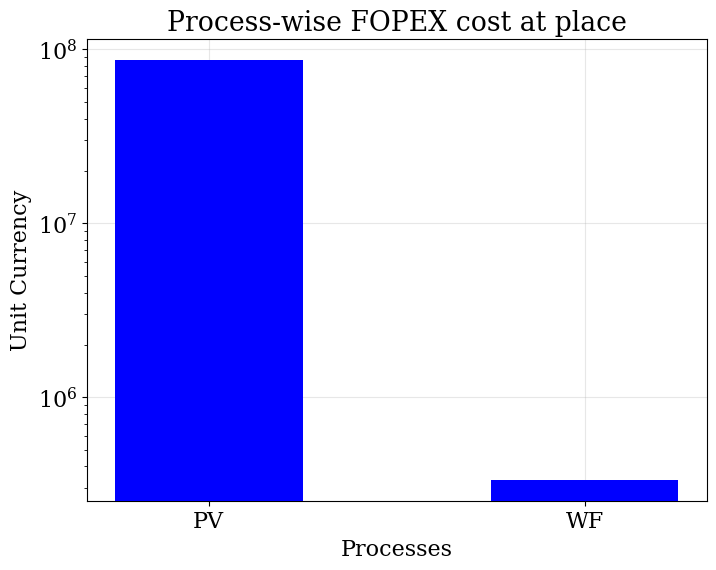

In [26]:

plot_results.cost(results=results, x=CostX.PROCESS_WISE,
                  y=CostY.FOPEX, location='place', fig_size=(8, 6))


![Fopex](plots/fopex.png)


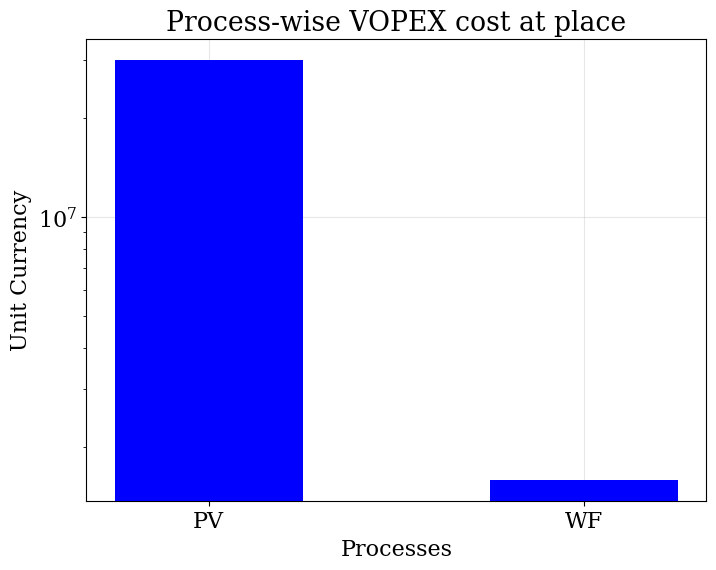

In [27]:

plot_results.cost(results=results, x=CostX.PROCESS_WISE,
                  y=CostY.VOPEX, location='place', fig_size=(8, 6))


![Vopex](plots/vopex.png)


**Accessing results and inputs**

All inputs are stored in results.component

All outputs are stored in results.output

Values can be accessed as shown below

In [28]:
results.output['Cap_P']


{('place', 'PV', 0): 100.0,
 ('place', 'WF', 0): 100.0,
 ('place', 'LiI_discharge', 0): 100.0,
 ('place', 'LiI', 0): 0.0}

In [29]:
results.output['P']


{('place', 'PV', 0, 0): 66.66666666666666,
 ('place', 'PV', 0, 1): 88.8888888888889,
 ('place', 'PV', 0, 2): 100.0,
 ('place', 'PV', 0, 3): 77.77777777777777,
 ('place', 'WF', 0, 0): 100.0,
 ('place', 'WF', 0, 1): 88.8888888888889,
 ('place', 'WF', 0, 2): 55.55555555555556,
 ('place', 'WF', 0, 3): 77.77777777777777,
 ('place', 'LiI_discharge', 0, 0): 0.0,
 ('place', 'LiI_discharge', 0, 1): 0.0,
 ('place', 'LiI_discharge', 0, 2): 0.0,
 ('place', 'LiI_discharge', 0, 3): 0.0,
 ('place', 'LiI', 0, 0): 0.0,
 ('place', 'LiI', 0, 1): 0.0,
 ('place', 'LiI', 0, 2): 0.0,
 ('place', 'LiI', 0, 3): 0.0}